# Geometric Brownian Motion Simulation
---
### Simulates underlying asset prices using geometric brownian motion for option pricing and hedging experiments
Credits to: [Gregory Gunderson](https://gregorygundersen.com/blog/2024/04/13/simulating-gbm/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We can adapt the classic GBM formula for continuous plots into a discrete-time 
approximation using the formula:

$$
S_{t+\Delta t} = S_t \cdot \exp\Big((\mu - \frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{\Delta t} Z_t\Big)
$$
where $Z_t \sim N(0,1)$ is a standard normal random variable.

This allows us to generate the value of the asset at the current time interval 
using its values at past intervals

In [3]:
# Initialise Parameters

# initial asset price before simulation
S0 = 100

# annualised drift (expected returns)
mu = 0.05

# annualised volatility
sigma = 0.2

# time step value (daily for all trading days ~252)
dt = 1/252

T = 252
n_paths = 1000

Our next step is to simulate a GBN path using our parameters and the equation 
defined above, which we can represent in python in the following method:

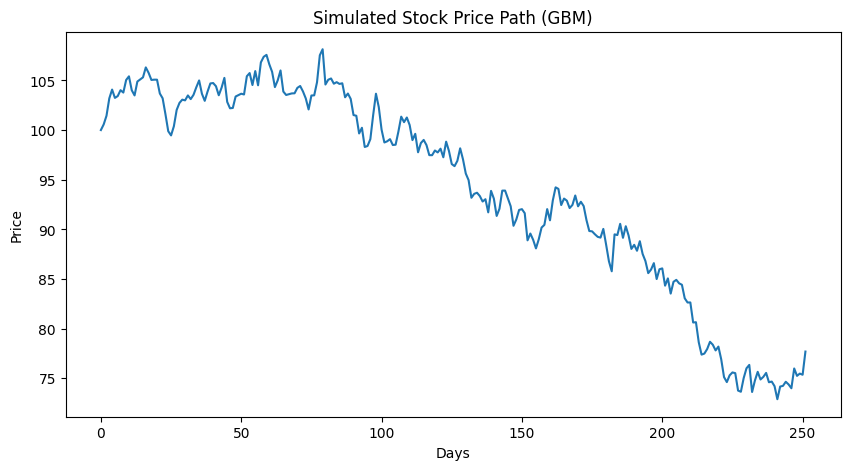

In [58]:
prices = np.zeros(T)
prices[0] = S0

for i in range(1, T):
    Z = np.random.normal()
    prices[i] = prices[i - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

# Plotting the path
plt.figure(figsize=(10,5))
plt.plot(prices)
plt.title("Simulated Stock Price Path (GBM)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

Next for the purpose of exterminating outlier paths, we will now simulate multiple
paths this will provide us with a range of values that the GBN can produce over n walks

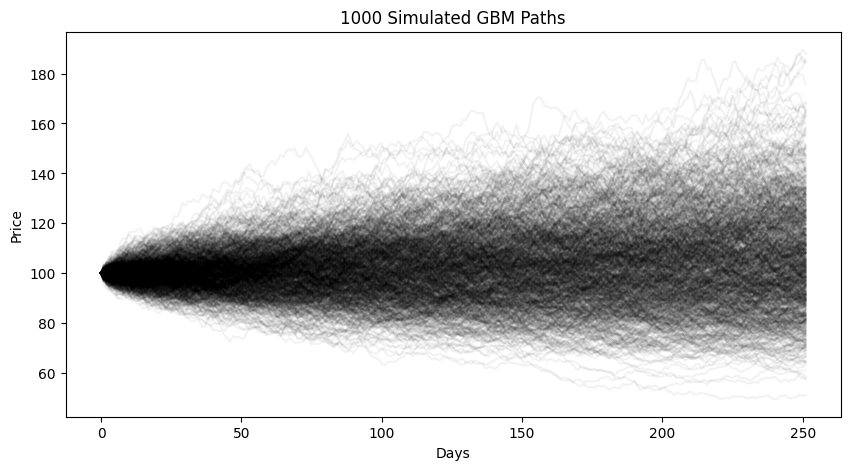

In [82]:
all_paths = np.zeros((n_paths, T))

for i in range(n_paths):
    prices = np.zeros(T)
    prices[0] = S0
    for t in range(1, T):
        Z = np.random.normal()
        prices[t] = prices[t-1] * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    all_paths[i] = prices

# Plot first 10 paths
plt.figure(figsize=(10,5))
plt.plot(all_paths.T, color='black', alpha=0.05)
plt.title("1000 Simulated GBM Paths")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [93]:
log_returns = np.log(all_paths[:,1:] / all_paths[:,:-1])
print("Average daily log return:", log_returns.mean())
print("Daily volatility (std dev):", log_returns.std())

Average daily log return: 0.0001411043761028242
Daily volatility (std dev): 0.01257966279426244


## Key Takeaways from Simulation

### Daily Metrics
- **Average Daily Log Return (μ):** 14.11 × 10⁻⁵ (0.0141%)
- **Daily Volatility (σ):** 0.01257 (1.257%)

### Annualized Metrics
- **Annualized Drift:** ~3.55% (0.0141% × 252)
- **Annualized Volatility:** ~19.95% (1.257% × √252)

## Key Observations

### Return Characteristics
- Very small positive daily drift indicates modest upward trend
- The asset shows slow but consistent expected growth
- Daily returns are nearly centered around zero with slight positive bias

### Volatility Profile
- Daily volatility of 1.257% represents moderate price fluctuations
- Annualized volatility of ~20% is typical for equity markets
- Day-to-day price movements dominated by random fluctuations rather than drift

### Risk-Return Analysis
- **Volatility-to-Return Ratio:** High - the asset exhibits significant volatility relative to expected returns
- **Risk Assessment:** Moderate risk with modest compensation
- Short-term uncertainty is substantial compared to long-term expected gains

## Practical Implications
- Over short periods (days/weeks), price movements are primarily driven by volatility
- The positive drift becomes more apparent over longer horizons (months/year)
- Asset behavior consistent with a stable equity instrument or index fund
- 1,000 path simulations provide robust statistical confidence in these estimates

## Conclusion
The GBM simulation reveals an asset with low daily returns but moderate volatility, characteristic of typical equity markets. The simulated paths demonstrate how short-term randomness can dominate despite positive long-term drift.